In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# parameter settings

mu = 1/20
n_bev_init = 8000
rho = 0.1
t_session = 0.8   #h
t_service = 1   #h
d_average_curr = (9 + 5 + 6)/3 * 2 * 2
n_days_recharge = 6


In [85]:
n_cp_public = mu * n_bev_init
n_bev_public = rho * n_cp_public
n_bev_day_cp_public = n_bev_public / n_days_recharge

p_occupied = t_session / t_service

n_cp_available = np.log(0.6)/np.log(p_occupied)
detour_distance = n_cp_available * d_average_curr       # min

print('Number of charging points available: ', n_cp_available)
print('Detour distance: ', detour_distance)
print(p_occupied)
print(n_bev_day_cp_public)
print(d_average_curr)

Number of charging points available:  2.289224226994103
Detour distance:  61.045979386509416
0.8
6.666666666666667
26.666666666666668


In [95]:
area = 7243
population_density = 310

city_density = 6000

ratio_build_env = population_density/city_density
effective_area = area * ratio_build_env
print(area, effective_area, ratio_build_env)

7243 374.22166666666664 0.051666666666666666


In [96]:
nb_points_per_site_average = 2 * 1.4
nb_sites = n_cp_public/nb_points_per_site_average
d_arieal = (1/2) * np.sqrt(effective_area/nb_sites)
print(d_arieal)
print(d_arieal * (1/40) * 60, " min")
print(nb_sites)

0.8092514545347859
1.213877181802179  min
142.85714285714286


In [ ]:
alpha = 8
detour_distance_abl = alpha * d_arieal
print(detour_distance_abl, d_arieal)
print(detour_distance_abl * (1/40) * 60, " min")

1.9252174963062323 0.3208695827177054
2.8878262444593488  min


## Creating densification reduction curves

C:\Users\golab\AppData\Local\Temp\ipykernel_27744\702245291.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  d_arieal = (1/2) * np.sqrt(effective_area/nb_sites) * alpha


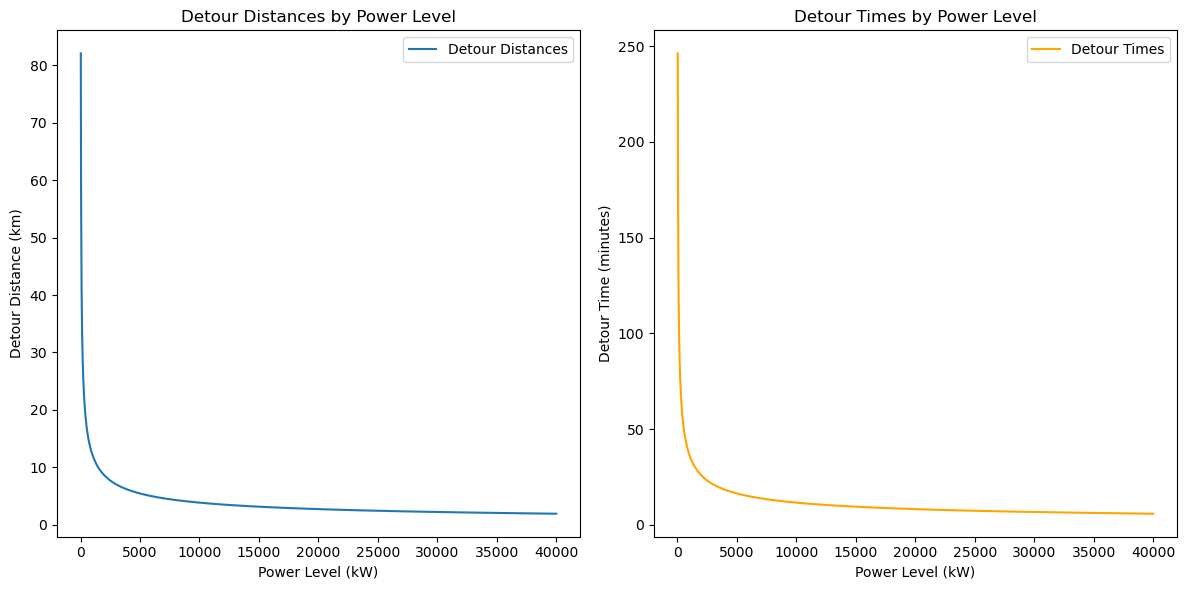

In [104]:
# First: Densification focused approach
detour_time_init = detour_distance
average_power = 22  # kW 
max_power = 40 * 1000
nb_points_per_site_average = 2
detour_distances = []
detour_times = []
power_levels = []
for power in np.arange(0, max_power, average_power):
    nb_points = power / average_power
    nb_sites = nb_points / nb_points_per_site_average
    d_arieal = (1/2) * np.sqrt(effective_area/nb_sites) * alpha
    detour_distances.append(d_arieal)
    detour_times.append(d_arieal * (1/40) * 60 * 2)
    power_levels.append(power)


plt.figure(figsize=(12, 6))

# Plot detour distances by power level
plt.subplot(1, 2, 1)
plt.plot(power_levels, detour_distances, label='Detour Distances')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Distance (km)')
plt.title('Detour Distances by Power Level')
plt.legend()

# Plot detour times by power level
plt.subplot(1, 2, 2)
plt.plot(power_levels, detour_times, label='Detour Times', color='orange')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level')
plt.legend()

plt.tight_layout()
plt.show()

140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140.1818181818182
140.6818181818182
141.1818181818182
141.6818181818182
142.1818181818182
142.6818181818182
143.1818181818182
143.6818181818182
144.1818181818182
144.6818181818182
145.1818181818182
145.6818181818182
146.1818181818182
146.6818181818182
147.1818181818182
147.6818181818182
148.1818181818182
148.6818181818182
149.1818181818182
149.6818181818182
150.1818181818182
150.6818181818182
151.1818181818182
151.681818

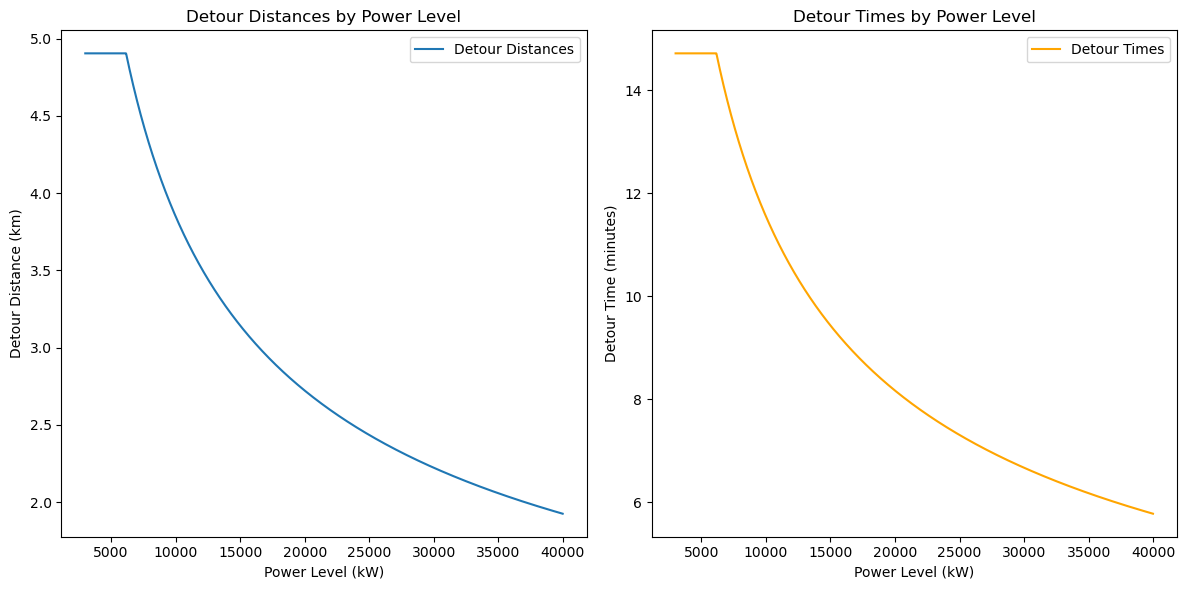

In [105]:
# todo introduce current charging infrastructure for intialization
current_power = n_cp_public * 15 / 2
current_nb_cs = 140
detour_time_init = detour_distance
average_power = 22  # kW 
max_power = 40 * 1000
nb_points_per_site_average = 2
detour_distances = []
detour_times = []
power_levels = []
for power in np.arange(current_power, max_power, average_power):
    # filling up charging stations
    nb_points = power / average_power
    nb_sites = nb_points / nb_points_per_site_average
    if nb_sites < current_nb_cs:
        nb_sites = current_nb_cs
    print(nb_sites)
    d_arieal = (1/2) * np.sqrt(effective_area/nb_sites) * alpha
    detour_distances.append(d_arieal)
    detour_times.append(d_arieal * (1/40) * 60 * 2)
    power_levels.append(power)

plt.figure(figsize=(12, 6))

# Plot detour distances by power level
plt.subplot(1, 2, 1)
plt.plot(power_levels, detour_distances, label='Detour Distances')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Distance (km)')
plt.title('Detour Distances by Power Level')
plt.legend()

# Plot detour times by power level
plt.subplot(1, 2, 2)
plt.plot(power_levels, detour_times, label='Detour Times', color='orange')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level')
plt.legend()

plt.tight_layout()
plt.show()

In [141]:
def decreasing_detouring_time(nb_points_per_site_average):
    current_power = n_cp_public * 15 / 2
    current_nb_cs = 140
    detour_time_init = detour_distance
    average_power = 22  # kW 
    max_power = 100000
    detour_distances = []
    detour_times = []
    power_levels = []
    detour_times_dic = {}
    for power in np.arange(current_power, max_power, 10):
        # filling up charging stations
        nb_points = power / average_power
        nb_sites = nb_points / nb_points_per_site_average
        if nb_sites < current_nb_cs:
            nb_sites = current_nb_cs
        print(nb_sites)
        d_arieal = (1/2) * np.sqrt(effective_area/nb_sites) * alpha
        detour_distances.append(d_arieal)
        detour_times.append(d_arieal * (1/40) * 60 * 2)
        power_levels.append(power)
        detour_times_dic[power] =d_arieal * (1/40) * 60 * 2
    
    return detour_distances, detour_times, power_levels, detour_times_dic

140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140


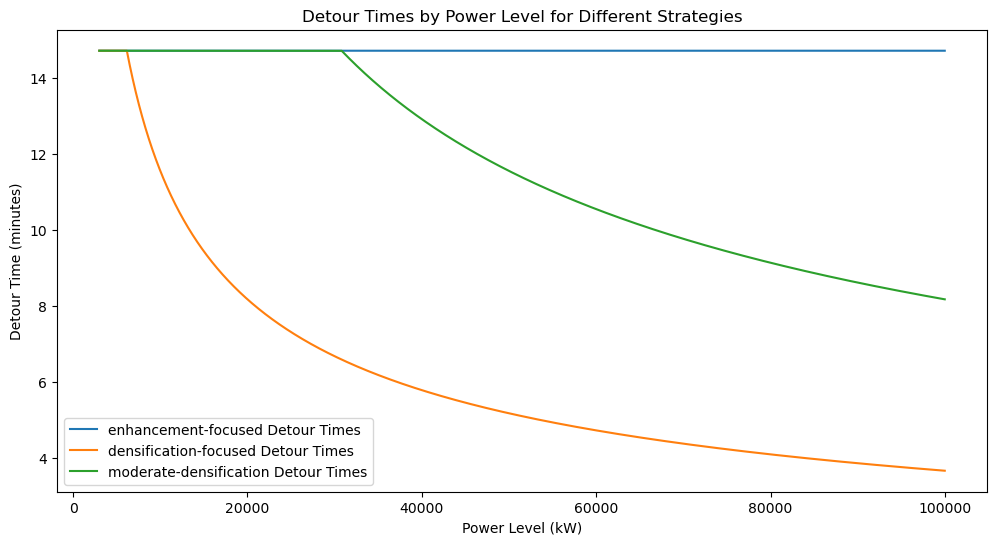

In [142]:
nb_points_per_site = {"enhancement-focused": 40, "densification-focused": 2, "moderate-densification": 10}
output = {}
for strategy in nb_points_per_site.keys():
    detour_distances, detour_times, power_levels, detour_times_dic = decreasing_detouring_time(nb_points_per_site[strategy])
    output[strategy] = {"detour_distances": detour_distances, "detour_times": detour_times, "power_levels": power_levels, "detour_times_dic": detour_times_dic}

plt.figure(figsize=(12, 6))

# Plot detour times for different strategies
for strategy in output.keys():
    plt.plot(output[strategy]["power_levels"], output[strategy]["detour_times"], label=f'{strategy} Detour Times')

plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level for Different Strategies')
plt.legend()
plt.show()



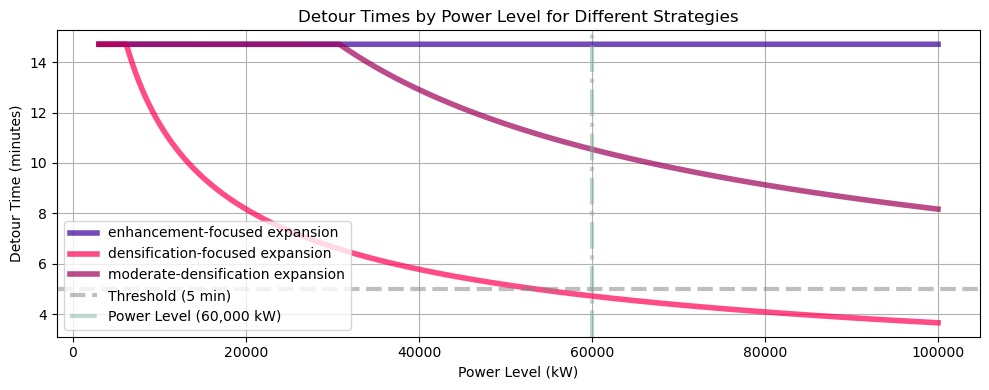

In [143]:
plt.figure(figsize=(10, 4))
colors = {"enhancement-focused":"#390099" , "densification-focused": "#ff0054", "moderate-densification": "#9e0059"}
# Plot detour times for different strategies
for strategy in output.keys():
    plt.plot(output[strategy]["power_levels"], output[strategy]["detour_times"], label=f'{strategy} expansion', color = colors[strategy], linewidth=4, alpha=0.7)

plt.axhline(y=5, color='gray', linestyle='--', linewidth=3, label='Threshold (5 min)', alpha=0.5)
plt.axvline(x=60000, color='#81b29a', linestyle='-.', linewidth=3, label='Power Level (60,000 kW)', alpha=0.5)
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level for Different Strategies')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('detour_times_by_power_level.png', transparent=True)
plt.show()

In [ ]:

steps_of_reduction = {
    "densification-focused": [(5000, 15000), (15000, 20000), (20000, 30000), (30000, 1000000)],
    "moderate-densification": [(30000, 45000), (45000, 1000000)],
}

maximal_total_power = 60000
strategies = []
lb = []
ub = []
reduction = []
for strategy in steps_of_reduction.keys():
    for step in steps_of_reduction[strategy]:
        strategies.append(strategy)
        lb.append(step[0])
        ub.append(step[1])
        lower_value = step[0]
        upper_value = step[1]
        if upper_value > maximal_total_power:
            upper_value = maximal_total_power
        average_detour_time = (detour_times_dic[lower_value] - detour_times_dic[upper_value]) / 2
        reduction_value = 1 - (detour_time_init - average_detour_time) / detour_time_init
        reduction.append(reduction_value)

df = pd.DataFrame({"strategy": strategies, "lower_bound": lb, "upper_bound": ub, "reduction": reduction})

df.to_csv('reduction_values.csv', index=False)


KeyError: 1000000